In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt      
%matplotlib inline 
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\karth\Desktop\Great Learning\pima-indians-diabetes.csv")
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

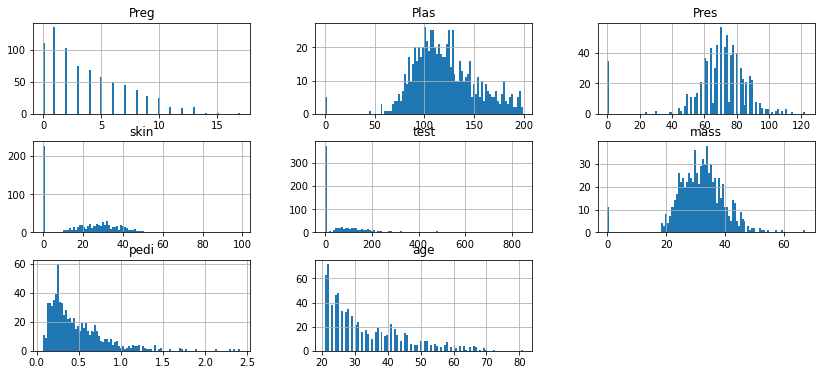

In [5]:
columns=list(df)[0:-1]
df[columns].hist(bins=100,stacked=False,figsize=(14,30),layout=(14,3))
plt.show()

In [6]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.cov()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Plas,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
Pres,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
skin,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
test,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
mass,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
pedi,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
class,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


In [8]:
def plot_corr(df,size=11):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

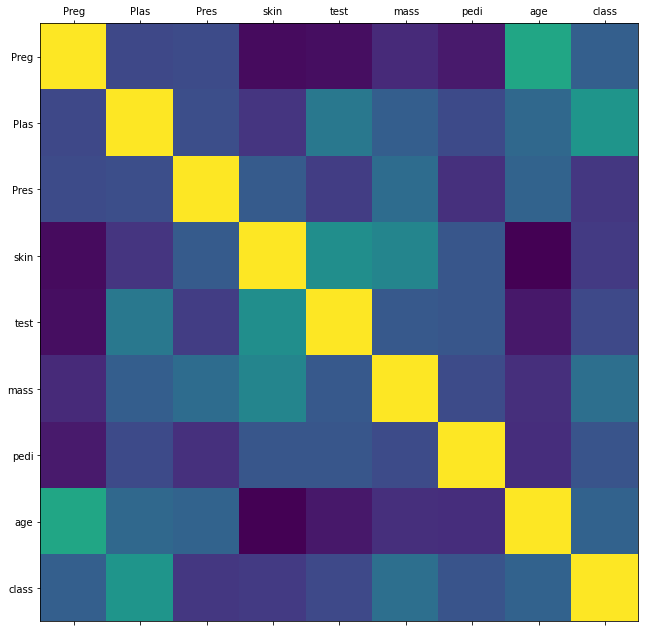

In [9]:
plot_corr(df)

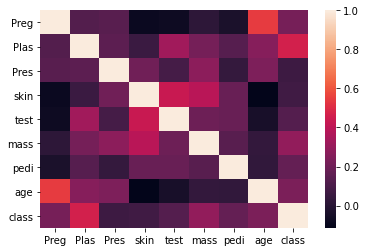

In [22]:
sns.heatmap(df.corr(),annot=False)
plt.show()

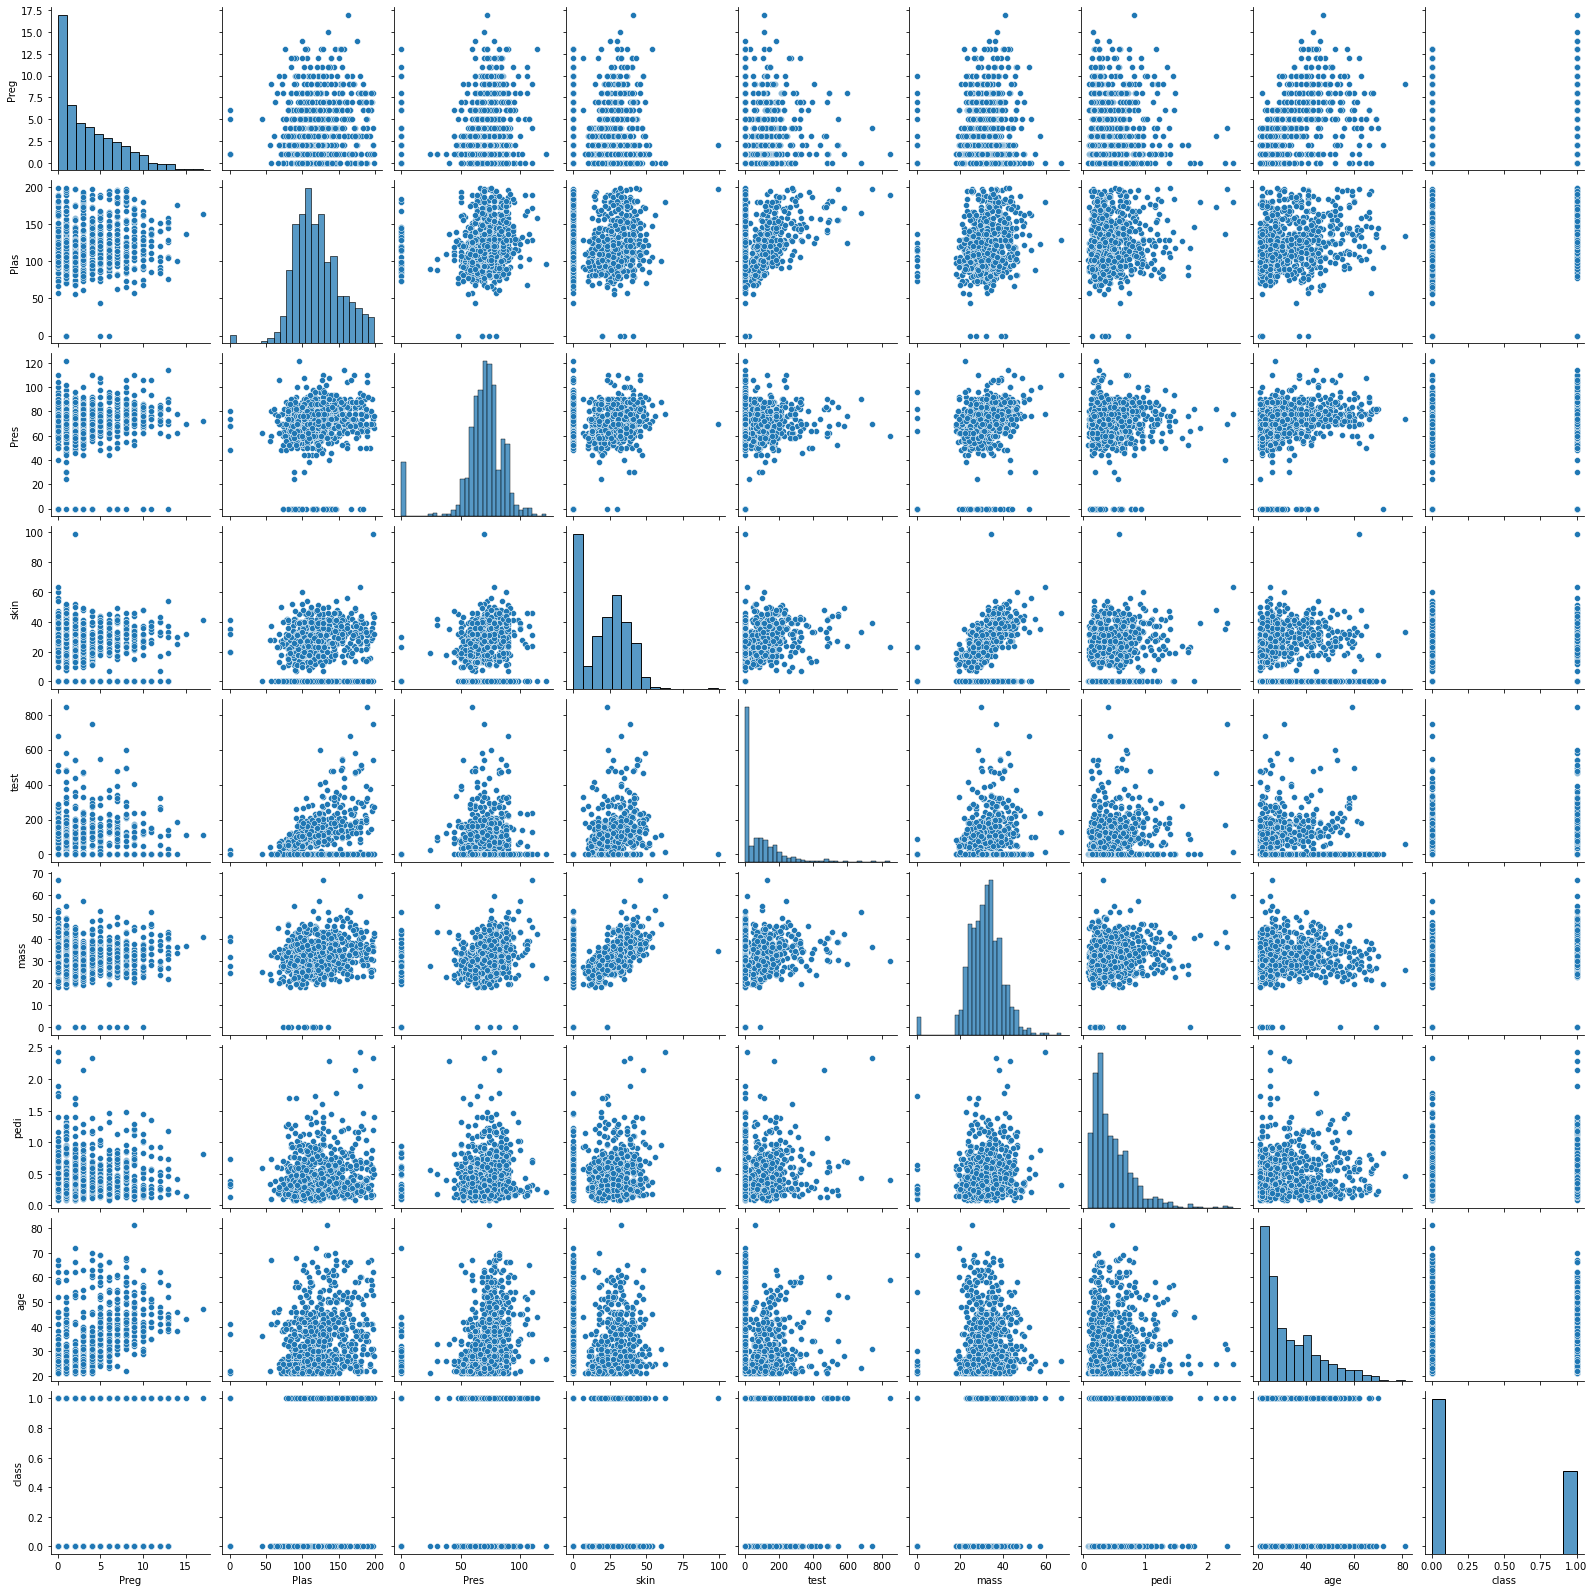

In [23]:
sns.pairplot(df)

In [24]:
n_true=len(df.loc[df["class"]==1])
n_false=len(df.loc[df["class"]==0])

In [25]:
n_true

268

In [26]:
n_false

500

In [27]:
print("Number of True class {} in % {}".format(n_true,(n_true/(n_true+n_false)*100)))
print("Number of False class {} in % {}".format(n_false,(n_false/(n_true+n_false)*100)))

Number of True class 268 in % 34.89583333333333
Number of False class 500 in % 65.10416666666666


#### So... we have 34% of people with Diabetes & 65% without Diabetes

# spliting  The Data

In [28]:
from sklearn.model_selection import train_test_split

X=df.drop("class",axis=1)
y=df["class"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [29]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)* 100)))
print("{0:0.2f}% data is in training set".format((len(X_test)/len(df.index)* 100)))

69.92% data is in training set
30.08% data is in training set


In [30]:
X_test

,Preg,Plas,Pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22
599,1,109,38,18,120,23.1,0.407,26
650,1,91,54,25,100,25.2,0.234,23
11,10,168,74,0,0,38.0,0.537,34


# Data Preparation 

#### Cheacking the Missing Value in our data 

In [31]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### We can see lots of Missing Values with 0s replacing those with mean value

In [36]:
from sklearn.impute import SimpleImputer

rep0 = SimpleImputer(missing_values=0, strategy="mean")


cols=X_train.columns

X_train=pd.DataFrame(rep0.fit_transform(X_train))
X_test=pd.DataFrame(rep0.fit_transform(X_test))

X_train.columns=cols
X_test.columns=cols

X_train.head()


,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


# Now we can Run Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log=LogisticRegression(solver='lbfgs')

In [39]:
log.fit(X_train,y_train)

C:\Users\karth\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_predict=log.predict(X_test)
print(y_predict)
print("--"*40)
coef=pd.DataFrame(log.coef_)
coef["Intercept"]=log.intercept_
print(coef)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
--------------------------------------------------------------------------------
          0         1         2         3         4         5         6  \
0  0.127377  0.033572 -0.015035 -0.010176 -0.000387  0.116694  0.770184   

          7  Intercept  
0  0.020054  -8.887791  


In [41]:
Model_score_test=log.score(X_test,y_test)
print(Model_score_test)

0.7835497835497836


In [42]:
from sklearn import metrics

cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
print(cm)

[[ 51  34]
 [ 16 130]]


<AxesSubplot:>

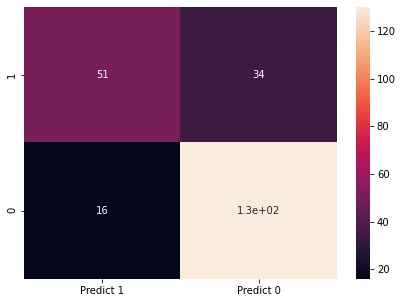

In [43]:
fig_cm=pd.DataFrame(cm,[i for i in ["1","0"]],
                    columns=[i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(fig_cm,annot=True)